# CASE STUDY: FASHION CLASS CLASSIFICATION 
# Nikhil Gupta

# STEP #1: Problem Statement and Business Case

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  

0 => T-shirt/top

1 => Trouser

2 => Pullover

3 => Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 



# STEP #2: Importing and Understanding Data

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('inputs/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('inputs/fashion-mnist_test.csv', sep=',')

In [3]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(fashion_train_df.shape)
# After you shape, 60,000 training dataset are present

(60000, 785)


In [5]:
print(fashion_test_df.shape)
# After you shape, 10,000 training dataset are present

(10000, 785)


In [6]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


We can not reshape a pandas DataFrame directly, because there is no reshape function for pandas DataFrame.
Whereas you can do reshape on numpy by following steps:

1. Convert DataFrame to numpy array
2. Do reshape
3. Convert back to pandas if needed

In [7]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# STEP #3: Visualization of the Dataset

3.0

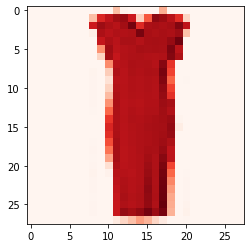

In [10]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28)), cmap = 'Reds') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Showing the too along with image
label = training[i,0]
label

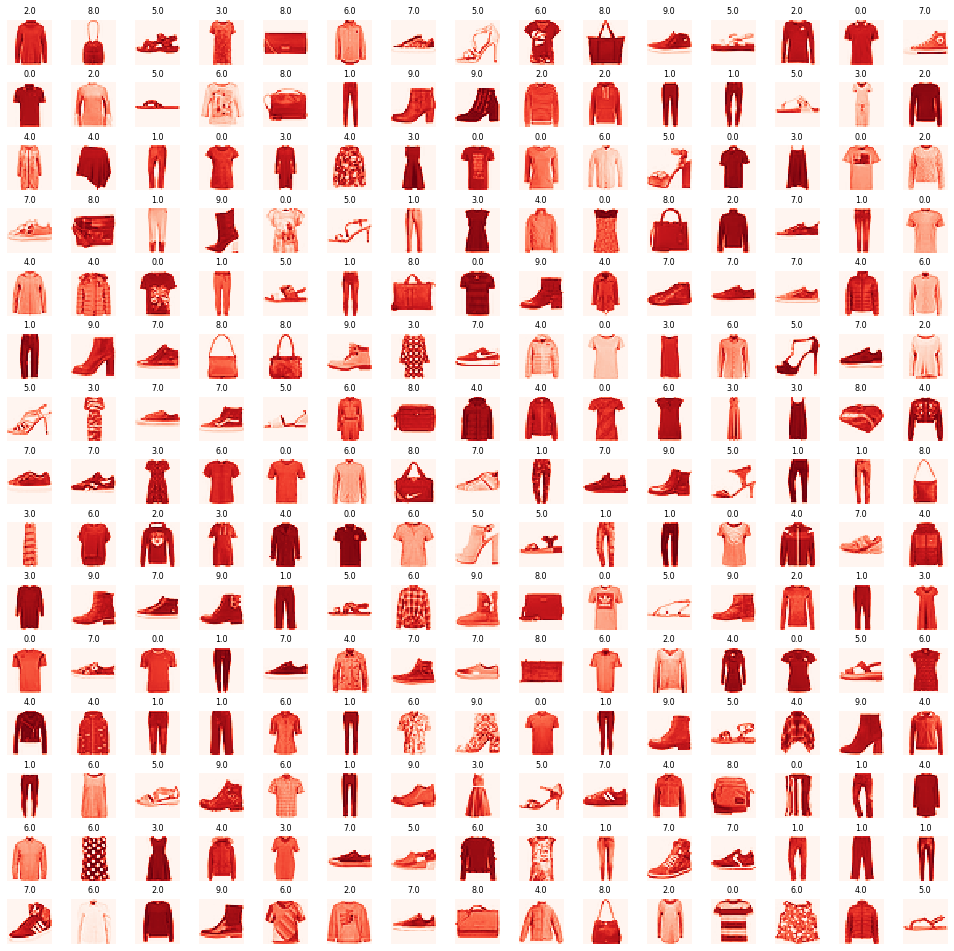

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)), cmap = 'Reds')
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)        

# STEP #4: Training the Model

In [12]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255 # normalization
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
# Splitting the data between train and validate
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [14]:
X_train.shape

(48000, 784)

In [15]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [17]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [18]:
# Import train_test_split from scikit library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


In [19]:
cnn_model = Sequential()

In [20]:
# cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# We tried 32 fliters first and then 64 fliters with and without dropout to improve the performance of our model
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

In [21]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [22]:
# Improve the performance
cnn_model.add(Dropout(0.25))

In [23]:
cnn_model.add(Flatten())

In [24]:
# Hidden layer
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [25]:
# Output layer, as we know we have 10 output
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [26]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [27]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.9385 - accuracy: 0.6993 - val_loss: 0.4861 - val_accuracy: 0.8281
Epoch 2/50
48000/48000 [==============================] - 71s 1ms/step - loss: 0.4517 - accuracy: 0.8420 - val_loss: 0.4372 - val_accuracy: 0.8473
Epoch 3/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3683 - val_accuracy: 0.8715
Epoch 4/50
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3649 - accuracy: 0.8717 - val_loss: 0.3417 - val_accuracy: 0.8827
Epoch 5/50
48000/48000 [==============================] - 63s 1ms/step - loss: 0.3421 - accuracy: 0.8793 - val_loss: 0.3517 - val_accuracy: 0.8771
Epoch 6/50
48000/48000 [==============================] - 63s 1ms/step - loss: 0.3264 - accuracy: 0.8858 - val_loss: 0.3160 - val_accuracy: 0.8910
Epoch 7/50
48000/48000 [==============================] - 64s 1ms/st

# STEP #5: Evaluating the Model

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 4s 384us/step
Test Accuracy : 0.920


In [29]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

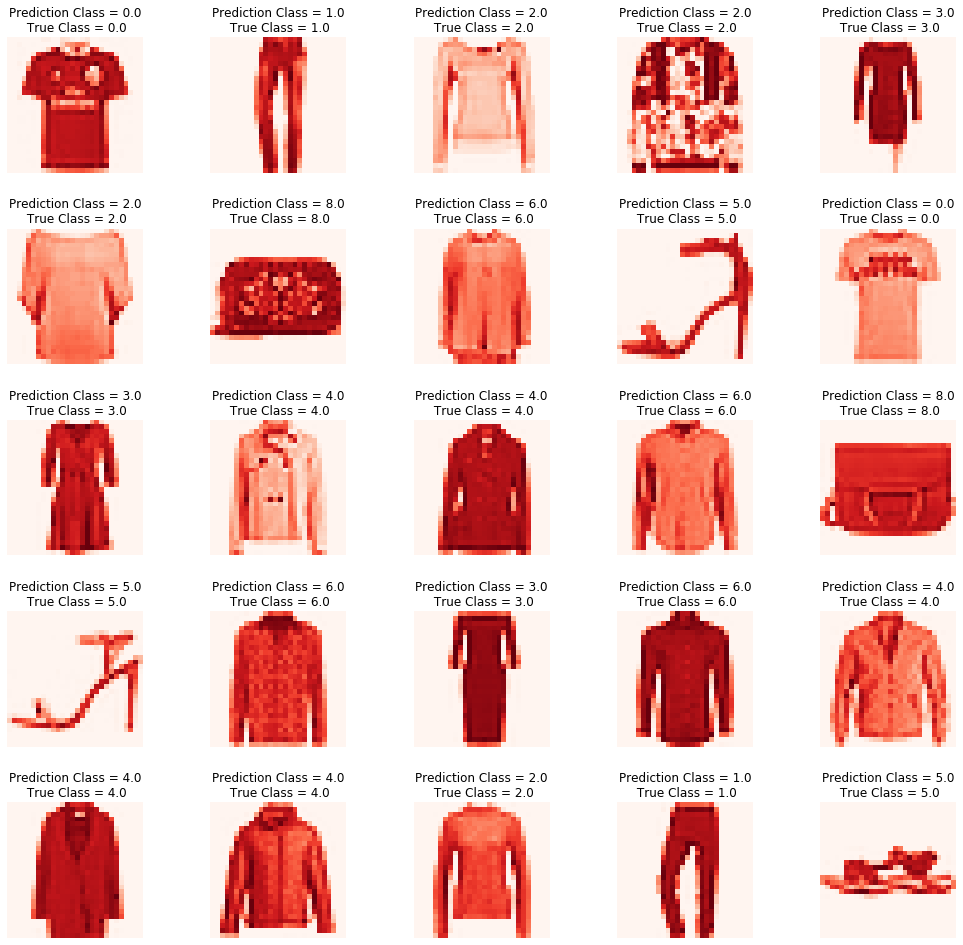

In [30]:
# Plot the predictions of the test data with Prediction Class and True Class
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (17,17))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28), cmap = 'Reds')
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

###### Remember the 10 classes decoding is as follows:
Class 0 => T-shirt/top  
Class 1 => Trouser  
Class 2 => Pullover  
Class 3 => Dress  
Class 4 => Coat  
Class 5 => Sandal  
Class 6 => Shirt  
Class 7 => Sneaker  
Class 8 => Bag  
Class 9 => Ankle boot

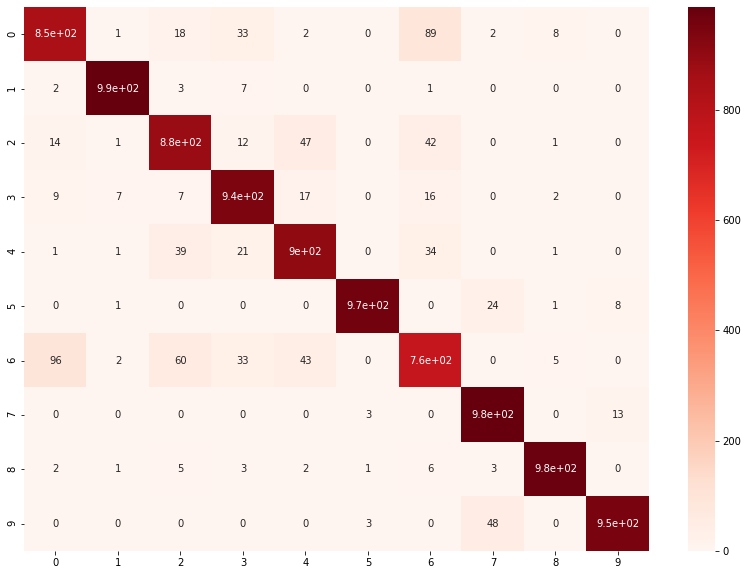

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap='Reds', annot=True)
# Sum the diagonal element to get the total true correct values

In [32]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.85      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.88      0.88      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.89      0.90      0.90      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.80      0.76      0.78      1000
     Class 7       0.93      0.98      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## End of this case study! 

## Above case study is very helpful for the recommendation system. This is also much beneficial for Fashion, Retail, and E-Commerce industry to suggest more content or products to their customer and improve their customer experience.